In [16]:
from os.path import join
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

root = "/home/tbarba/projects/MultiModalBrainSurvival/results/for_manuscript"


datasets = ["UKB", "UPENN", "UCSF", "SCHIZO",  "ADNI", "TCGA", "UKB"]
models = ["RAD", "UNET","AE","UVAE","VAE3D" ]

dfs = []
for d in datasets:
    for m in models:
        try:
            df = pd.read_csv(join(root, d, f"{root}/{d}_{m}.csv"))
            df["model"] = m
            df["dataset"] = d
            dfs.append(df)
        except:
            pass
df = pd.concat(dfs)

In [17]:
ukb_vars = pd.read_csv("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/UKBIOBANK/metadata/0-variable_list.csv", index_col="category").sort_index()
tcga_vars = pd.read_csv("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/TCGA/metadata/0-variable_list.csv", index_col="category").sort_index()
upenn_vars = pd.read_csv("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/UPENN/metadata/0-variable_list.csv", index_col="category").sort_index()
ucsf_vars = pd.read_csv("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/UCSF/metadata/0-variable_list.csv", index_col="category").sort_index()
adni_vars = pd.read_csv("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/ADNI/metadata/0-variable_list.csv", index_col="category").sort_index()
schizo_vars = pd.read_csv("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/SCHIZO/metadata/0-variable_list.csv", index_col="category").sort_index()

variables = pd.concat([ukb_vars, tcga_vars, upenn_vars, ucsf_vars, adni_vars, schizo_vars], axis=0).query("keep_model")["var"].reset_index()
df = pd.merge(df, variables, left_on="variable", right_on="var").drop("var", axis=1)

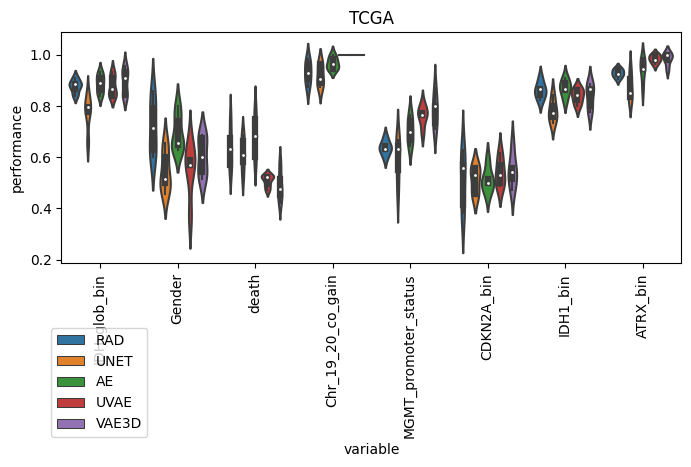

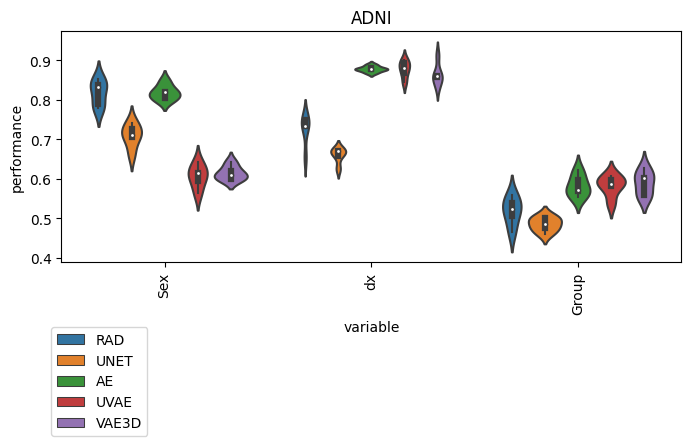

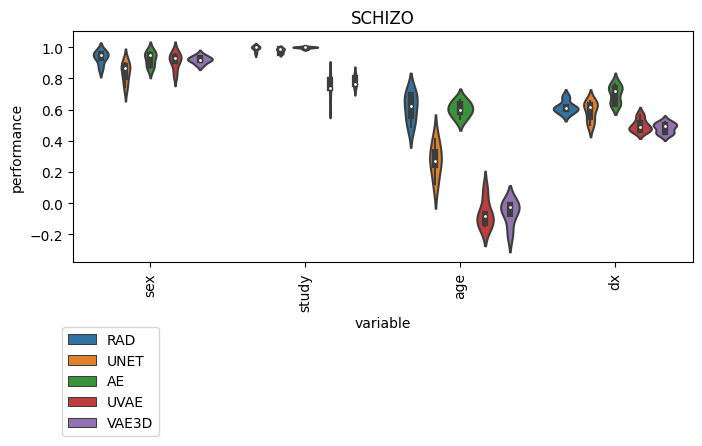

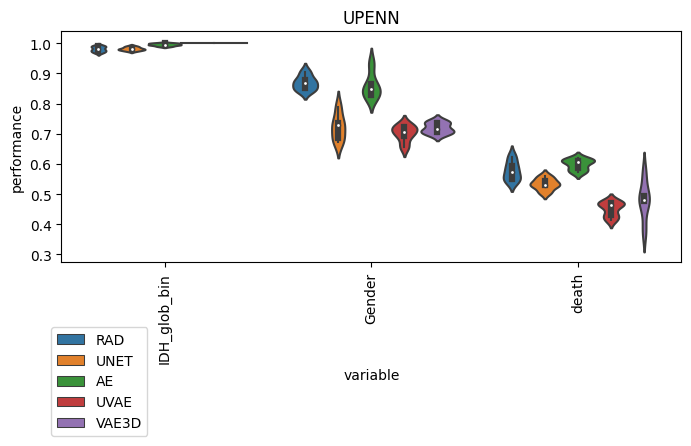

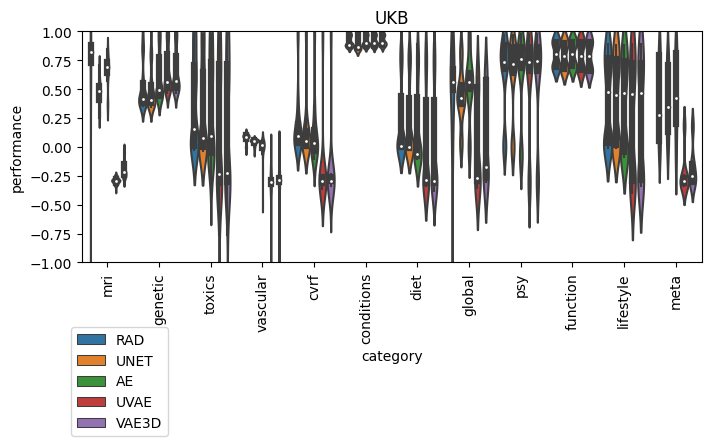

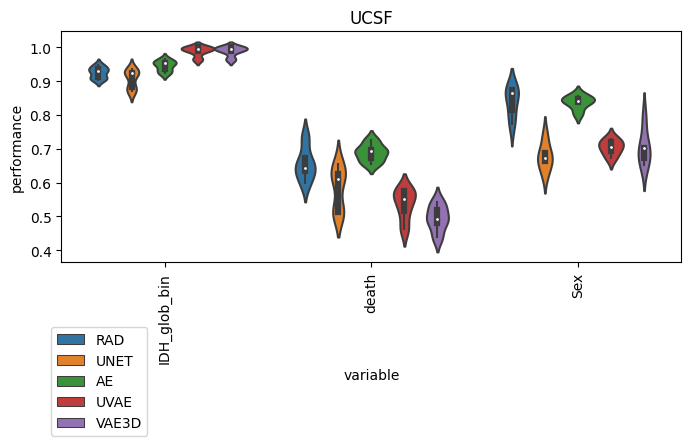

In [19]:
plt.rcParams['figure.figsize'] = [8, 3]
for dataset in set(df.dataset):
    X = "category" if dataset == "UKB" else "variable"
    plt.figure()
    sub = df.query("dataset == @dataset and 'grade' not in variable")#.sort_values(by=["model", "variable"])
    sns.violinplot(sub, x = X, y="performance", hue="model")
    plt.legend(bbox_to_anchor=(0.15, -0.25))
    plt.xticks(rotation=90)
    if dataset == "UKB":
        plt.ylim(-1,1)
    plt.title(dataset)


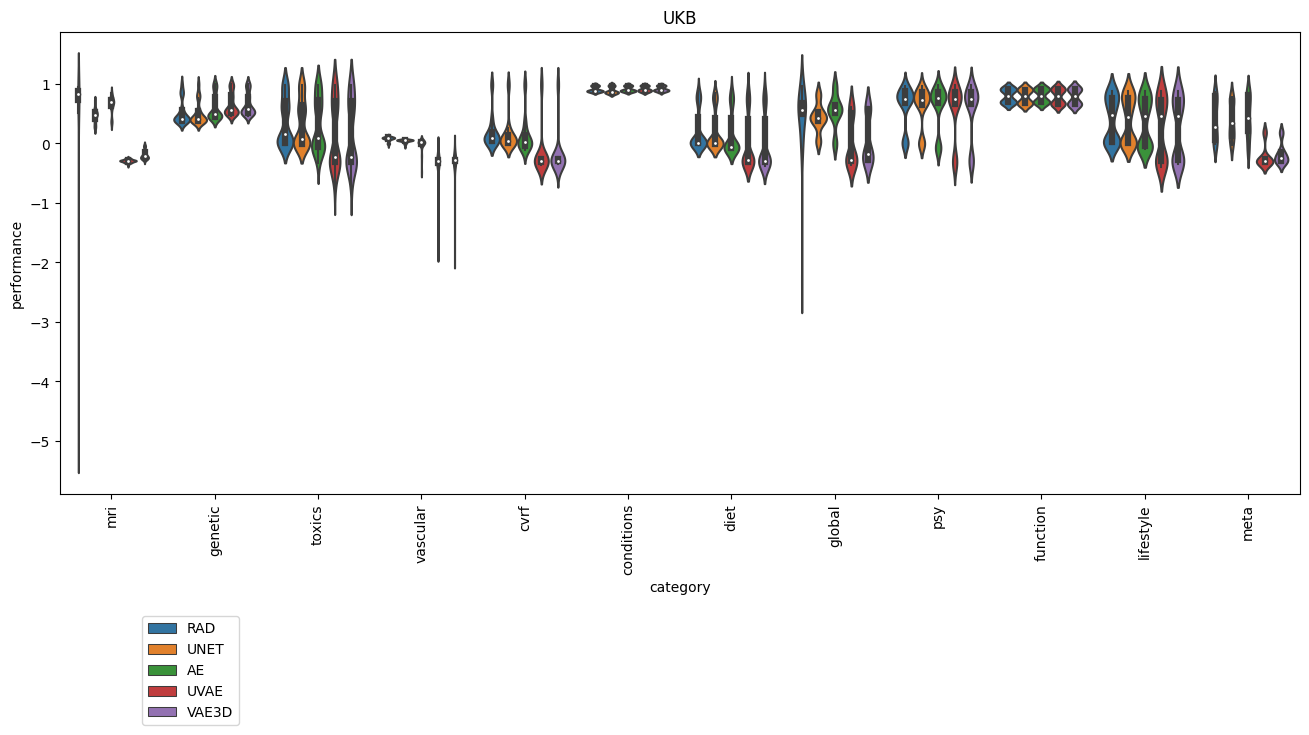

In [22]:
plt.rcParams['figure.figsize'] = [16, 6]
for dataset in ["UKB"]:
    X = "category" if dataset == "UKB" else "variable"
    plt.figure()
    sub = df.query("dataset == @dataset and 'grade' not in variable")#.sort_values(by=["model", "variable"])
    sns.violinplot(sub, x = X, y="performance", hue="model")
    plt.legend(bbox_to_anchor=(0.15, -0.25))
    plt.xticks(rotation=90)

    plt.title(dataset)

In [40]:
df.dataset.value_counts()

UKB      1011
TCGA      135
UPENN      80
UCSF       70
ADNI       15
Name: dataset, dtype: int64